
# ANA500 – Module 1: Data Organization & Analysis with Python **(+ SQL in Jupyter)**

Instructor: **Mohammad Ghaznavi**  
Course: **ANA500 – Python for Data Science**  

This notebook is designed to accompany Module 1 (three lessons) and includes an additional Lesson 4 for running SQL directly inside Jupyter. It is self‑contained and uses a realistic retail dataset (orders, customers, returns).

**Learning Goals**
- Load, organize, and explore data (Lesson 1)
- Clean messy data: types, missing values, duplicates, outliers (Lesson 2)
- Analyze and visualize data with aggregations and pivots (Lesson 3)
- Query data with SQL in Jupyter; combine SQL + Pandas (Lesson 4)

> Tip: Run cells (Shift+Enter) from top to bottom. Avoid skipping setup cells.


## 0) Environment Setup & Data Paths

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths to the demo data (exported alongside this notebook)
ORDERS_CSV = r"/Users/Mohammad/Downloads/orders.csv"
CUSTOMERS_CSV = r"/Users/Mohammad/Downloads/customers.csv"
RETURNS_CSV = r"/Users/Mohammad/Downloads/returns.csv"

pd.set_option("display.max_rows", 8)
pd.set_option("display.max_columns", 20)



---
## Lesson 1 — **Organizing Data with Python (Pandas)**

In this lesson we answer: **How do I load, inspect, navigate, and subset data so I can ask questions efficiently?**  
Common questions we can answer *after organizing* the data:
- What columns exist and what do they mean?
- How many orders and customers do we have?
- Which date range is covered?
- What is the schema and data types?
- How can I select rows/columns of interest quickly?


In [7]:

# Load the datasets
orders = pd.read_csv(ORDERS_CSV, parse_dates=["order_date","delivery_date"])
customers = pd.read_csv(CUSTOMERS_CSV)
returns = pd.read_csv(RETURNS_CSV)


In [8]:
orders.head()

,order_id,order_date,delivery_date,customer_id,segment,city,state,country,category,subcategory,product_name,quantity,unit_price,discount,shipping_cost,payment_method,order_priority,ship_mode,returned
0,500000,2023-03-07,2023-03-09,10134,Consumer,Baltimore,MD,USA,Office Supplies,Paper,Paper - Model 977,4,24.87,0.09,16.41,Credit Card,Low,Second Class,0
1,500001,2024-09-05,2024-09-06,10090,Corporate,Detroit,MI,USA,Furniture,Bookcases,Bookcases - Model 498,4,628.34,0.00,12.52,Debit Card,Low,Standard Class,0
2,500002,2024-09-18,2024-09-18,10154,Corporate,Saint Paul,MN,USA,Furniture,Bookcases,Bookcases - Model 902,4,391.17,0.04,6.47,Credit Card,Medium,Standard Class,0
3,500003,2023-12-30,2023-12-31,10210,Consumer,Philadelphia,PA,USA,Technology,Tablets,Tablets - Model 392,3,1383.26,0.00,8.32,Apple Pay,Low,Standard Class,0
4,500004,2023-12-04,2023-12-06,10208,Consumer,Memphis,TN,USA,Technology,Headphones,Headphones - Model 848,2,435.47,0.00,4.22,Credit Card,Medium,First Class,0


In [9]:
customers.head()

,customer_id,customer_name,segment,city,state,country,email
0,10001,Jamie Johnson,Consumer,Pittsburgh,PA,USA,customer10001@example.com
1,10002,Harper Smith,Consumer,Atlanta,GA,USA,customer10002@example.com
2,10003,Jamie Davis,Corporate,Raleigh,NC,USA,customer10003@example.com
3,10004,Morgan Patel,Consumer,Newark,NJ,USA,customer10004@example.com
4,10005,Hayden Patel,Consumer,Eugene,OR,USA,customer10005@example.com


In [10]:
returns.head()

,order_id,customer_id,return_reason
0,500010,10113,Damaged
1,500065,10051,Other
2,500100,10026,Wrong Item
3,500124,10097,Defective
4,500139,10056,Defective


In [11]:

# Inspect structure
print("Shape:", orders.shape)
orders.info()


Shape: (1505, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1505 non-null   int64         
 1   order_date      1505 non-null   datetime64[ns]
 2   delivery_date   1505 non-null   datetime64[ns]
 3   customer_id     1505 non-null   int64         
 4   segment         1495 non-null   object        
 5   city            1495 non-null   object        
 6   state           1495 non-null   object        
 7   country         1505 non-null   object        
 8   category        1505 non-null   object        
 9   subcategory     1505 non-null   object        
 10  product_name    1505 non-null   object        
 11  quantity        1505 non-null   int64         
 12  unit_price      1505 non-null   float64       
 13  discount        1505 non-null   float64       
 14  shipping_cost   1505 non-null   float6

In [12]:

# Peek at date range and basic columns
orders[["order_date","delivery_date"]].agg(['min','max'])


,order_date,delivery_date
min,2023-01-03,2023-01-04
max,2024-12-30,2025-01-05



### Selecting & Filtering
We often need to focus on slices of the data to answer questions.


In [13]:

# Select specific columns
orders[["order_id","order_date","state","category","quantity","unit_price"]].head()


,order_id,order_date,state,category,quantity,unit_price
0,500000,2023-03-07,MD,Office Supplies,4,24.87
1,500001,2024-09-05,MI,Furniture,4,628.34
2,500002,2024-09-18,MN,Furniture,4,391.17
3,500003,2023-12-30,PA,Technology,3,1383.26
4,500004,2023-12-04,TN,Technology,2,435.47


In [14]:

# Filter: IT category orders in California (CA) with quantity >= 3
mask = (orders["category"]=="Technology") & (orders["state"]=="CA") & (orders["quantity"]>=3)
orders.loc[mask, ["order_id","order_date","state","subcategory","quantity","unit_price"]].head()


,order_id,order_date,state,subcategory,quantity,unit_price
245,500245,2023-09-09,CA,Headphones,4,710.93
363,500363,2023-01-28,CA,Printers,4,666.46
533,500533,2024-03-09,CA,Tablets,3,1422.67
787,500787,2023-08-14,CA,Monitors,5,395.79
899,500899,2023-08-20,CA,Headphones,5,401.49



**Question we can answer by filtering:**  
- *Show me high‑value technology orders (unit_price > 1000) in the last quarter.*


In [15]:

latest_date = orders["order_date"].max()
quarter_start = (latest_date - pd.offsets.QuarterBegin(startingMonth=1)).normalize()
q_mask = (orders["order_date"]>=quarter_start) & (orders["category"]=="Technology") & (orders["unit_price"]>1000)
orders.loc[q_mask, ["order_id","order_date","product_name","unit_price","state"]].sort_values("unit_price", ascending=False).head(10)


,order_id,order_date,product_name,unit_price,state
460,500460,2024-10-07,Smartphones - Model 599,1857.32,CO
1288,501288,2024-11-22,Monitors - Model 278,1830.72,MI
695,500695,2024-11-13,Tablets - Model 568,1624.11,TX
876,500876,2024-11-11,Printers - Model 832,1593.60,MI
...,...,...,...,...,...
789,500789,2024-12-30,Monitors - Model 416,1492.09,FL
722,500722,2024-11-04,Tablets - Model 748,1466.38,FL
1055,501055,2024-12-27,Smartphones - Model 208,1447.44,NC
1318,501318,2024-12-25,Smartphones - Model 120,1421.88,NY



---
## Lesson 2 — **Cleaning Data (Types, Missing, Duplicates, Outliers)**

Cleaning ensures our answers are **correct**. You'll practice:
- Converting to proper types (dates, categories, numerics)
- Handling missing values (impute or drop)
- Removing duplicates
- Dealing with outliers (e.g., capping extreme values)


In [16]:

# Check missing values
orders.isna().sum().sort_values(ascending=False).head(10)


segment           10
city              10
state             10
order_id           0
                  ..
order_priority     0
payment_method     0
shipping_cost      0
discount           0
Length: 10, dtype: int64

In [17]:

# Example: fill missing 'city', 'state', and 'segment' using most frequent values (mode)
orders['city'] = orders['city'].fillna(orders['city'].mode()[0])
orders['state'] = orders['state'].fillna(orders['state'].mode()[0])
orders['segment'] = orders['segment'].fillna(orders['segment'].mode()[0])


In [18]:
# Check missing values again
orders.isna().sum().sort_values(ascending=False).head(10)

order_id          0
product_name      0
ship_mode         0
order_priority    0
                 ..
discount          0
unit_price        0
quantity          0
subcategory       0
Length: 10, dtype: int64

In [19]:

# Remove duplicate rows
before = len(orders)
orders = orders.drop_duplicates()
after = len(orders)
print(f"Removed {before - after} duplicate rows.")


Removed 5 duplicate rows.


In [20]:

# Create computed columns
orders["sales"] = (orders["unit_price"] * orders["quantity"]) * (1 - orders["discount"])
orders["profit_est"] = orders["sales"] - orders["shipping_cost"]
orders[["unit_price","quantity","discount","shipping_cost","sales","profit_est"]].head()


,unit_price,quantity,discount,shipping_cost,sales,profit_est
0,24.87,4,0.09,16.41,90.5268,74.1168
1,628.34,4,0.00,12.52,2513.3600,2500.8400
2,391.17,4,0.04,6.47,1502.0928,1495.6228
3,1383.26,3,0.00,8.32,4149.7800,4141.4600
4,435.47,2,0.00,4.22,870.9400,866.7200



### Detecting Outliers (IQR method) on `sales`
We cap extreme values to reduce their influence on summaries.


In [21]:

q1, q3 = orders["sales"].quantile([0.25, 0.75])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
orders["sales_capped"] = orders["sales"].clip(lower=low, upper=high)
orders[["sales","sales_capped"]].describe()


,sales,sales_capped
count,1500.000000,1500.000000
mean,1709.692295,1617.526545
std,2086.740448,1818.541503
min,3.543300,3.543300
25%,151.566300,151.566300
50%,899.670000,899.670000
75%,2505.647550,2505.647550
max,11661.686400,6036.769425



## 🔎 Detecting and Handling Outliers

### What is an Outlier?
An **outlier** is a data point that is significantly different from most other observations.  
- It may be **much larger or much smaller** than typical values.  
- Outliers can result from data entry errors, unusual events, or natural variation.  
- If left untreated, they can **skew statistics** like the mean, standard deviation, or regression models.

---

### What We Did Here
We applied the **Interquartile Range (IQR) method** to detect and handle outliers in the `sales` column:

1. **Calculated Q1 (25th percentile) and Q3 (75th percentile)** → the middle 50% of data.  
2. **Computed IQR = Q3 – Q1**.  
3. Defined thresholds:  
   - **Lower bound = Q1 – 1.5 × IQR**  
   - **Upper bound = Q3 + 1.5 × IQR**  
4. Any `sales` values outside this range were treated as outliers.  
5. We **capped** outliers to the nearest threshold using `.clip()`:  
   - Extremely low values were raised up to the lower bound.  
   - Extremely high values were reduced down to the upper bound.  

---

### Why This Matters
- The **mean** and **standard deviation** became more representative after capping.  
- The **median, Q1, and Q3** remained the same (since they are robust to outliers).  
- This ensures our **summaries and visualizations** are not dominated by just a few extreme sales.

> ✅ Outlier handling doesn’t mean deleting data — it’s about reducing their disproportionate influence.



---
## Lesson 3 — **Analyzing Data (Aggregations, GroupBy, Pivots, Visualization)**

Now that data are organized and clean, we can answer richer business questions:
- **Aggregation:** *What is total/average revenue by month or by category?*
- **Grouping:** *Which states or segments generate more sales?*
- **Pivoting:** *Cross‑tab views: category by state, etc.*
- **Visualization:** *Trends and comparisons with charts.*


In [24]:

# Revenue by category
rev_by_cat = orders.groupby("category")["sales"].sum().sort_values(ascending=False)
rev_by_cat


category
Technology         1.711555e+06
Furniture          7.955582e+05
Office Supplies    5.742538e+04
Name: sales, dtype: float64

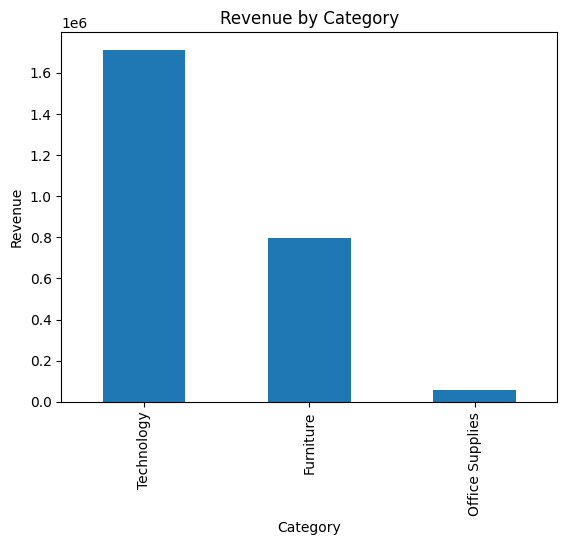

In [25]:

# Plot: revenue by category
rev_by_cat.plot(kind="bar", title="Revenue by Category")
plt.xlabel("Category"); plt.ylabel("Revenue")
plt.show()


In [26]:

# Monthly revenue trend
orders["year_month"] = orders["order_date"].dt.to_period("M").astype(str)
rev_by_month = orders.groupby("year_month")["sales"].sum()
rev_by_month.tail()


year_month
2024-08     79318.5265
2024-09     77280.6984
2024-10     77423.6404
2024-11    139676.5748
2024-12    134137.9820
Name: sales, dtype: float64

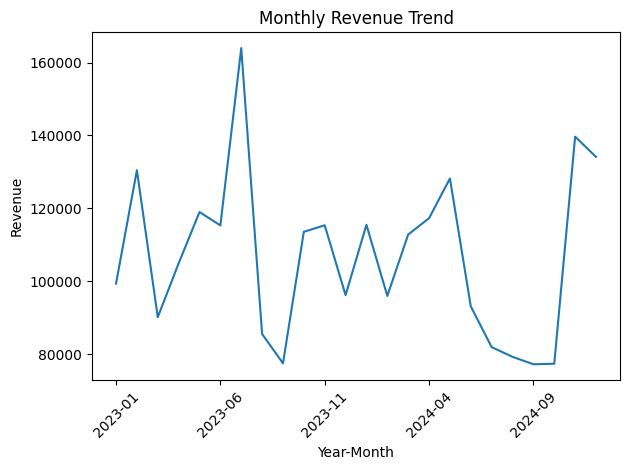

In [27]:

# Plot: monthly revenue
rev_by_month.plot(kind="line", title="Monthly Revenue Trend")
plt.xlabel("Year-Month"); plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:

# Average order value by state (top 10)
aov_state = (orders.groupby("state")["sales"].mean().sort_values(ascending=False)).head(10)
aov_state


state
AZ    2179.071402
CO    1962.460325
MI    1861.364175
CA    1851.311782
         ...     
TX    1797.363000
NJ    1791.627374
NC    1714.078625
NY    1705.714061
Name: sales, Length: 10, dtype: float64

In [29]:

# Pivot table: average sales by Segment and Category
pivot = pd.pivot_table(orders, values="sales", index="segment", columns="category", aggfunc="mean")
pivot.round(2)


category,Furniture,Office Supplies,Technology
segment,,,
Consumer,1597.53,109.11,3346.57
Corporate,1724.16,134.96,3230.53
Home Office,1704.95,125.92,2867.09



**Interpretation Examples**
- By **aggregating** sales by category, we discover which product lines drive the most revenue.
- A **time trend** reveals seasonality or growth/decline.
- **AOV by state** helps prioritize regions.
- **Pivot tables** highlight interactions between segment and category.



---
## Lesson 4 — **SQL for Data Analysis in Jupyter**

We will run SQL inside Jupyter using `ipython-sql` (SQLite).  
You can answer the *same* questions as in Lesson 3 with SQL and then bring results into Pandas.

> If the extension is missing, run `pip install ipython-sql sqlalchemy` in a notebook cell.


## Part 1: Conceptual Understanding
### Primary Key vs. Foreign Key
A **primary key** uniquely identifies each record in a table. A **foreign key** is a field in one table that refers to the primary key in another table.

**Example:**
- `Customers(customer_id, name)` → `customer_id` is the primary key.
- `Orders(order_id, customer_id)` → `customer_id` is a foreign key referencing `Customers.customer_id`.

## Part 2: Database Connection and Table Management with Python

In [67]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('company.db')
cursor = conn.cursor()

# Drop table(s) if they exist
cursor.execute("DROP TABLE IF EXISTS employees;")

cursor.execute("DROP TABLE IF EXISTS departments;")
# Create employees table
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    salary REAL
)
''')

# Confirm table creation
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('employees',)]


In [68]:
# Insert employee records
employees_data = [
    (1, 'Anna', 'HR', 52000),
    (2, 'Brian', 'IT', 65000),
    (3, 'Lena', 'Finance', 57000)
]

cursor.executemany("INSERT OR REPLACE INTO employees VALUES (?, ?, ?, ?)", employees_data)
conn.commit()

In [69]:
# Retrieve names and salaries sorted by highest salary
cursor.execute("SELECT name, salary FROM employees ORDER BY salary DESC")
for row in cursor.fetchall():
    print(row)

('Brian', 65000.0)
('Lena', 57000.0)
('Anna', 52000.0)


## Part 3: CRUD Operations with Python and SQL

In [70]:
# Update salary
cursor.execute("UPDATE employees SET salary = 55000 WHERE name = 'Anna'")

# Verify update
cursor.execute("SELECT * FROM employees WHERE name = 'Anna'")
print(cursor.fetchone())

(1, 'Anna', 'HR', 55000.0)


In [71]:
# Add Diana
cursor.execute("INSERT INTO employees VALUES (4, 'Diana', 'IT', 61000)")

# Delete Lena
cursor.execute("DELETE FROM employees WHERE name = 'Lena'")
conn.commit()

In [72]:
# Create departments table
cursor.execute('''
CREATE TABLE IF NOT EXISTS departments (
    dept_id INTEGER PRIMARY KEY,
    dept_name TEXT
)
''')

# Insert departments
departments_data = [
    (1, 'HR'),
    (2, 'IT'),
    (3, 'Finance')
]
cursor.executemany("INSERT OR REPLACE INTO departments VALUES (?, ?)", departments_data)
conn.commit()

In [73]:
# JOIN employees and departments
cursor.execute('''
SELECT e.name, e.department, d.dept_name
FROM employees e
JOIN departments d ON e.department = d.dept_name
''')

for row in cursor.fetchall():
    print(row)

('Anna', 'HR', 'HR')
('Brian', 'IT', 'IT')
('Diana', 'IT', 'IT')


### SQL Query Explanation
```sql
SELECT name, salary FROM employees WHERE department = 'IT' ORDER BY salary DESC LIMIT 2;
```
- **SELECT**: Retrieve name and salary columns
- **FROM**: Use the `employees` table
- **WHERE**: Filter rows where department is 'IT'
- **ORDER BY**: Sort results by salary in descending order
- **LIMIT 2**: Return only the top two results

In [50]:
# 1. Install the required packages (only needs to be run once)
#!pip install ipython-sql sqlalchemy

# 2. Load the SQL extension
%load_ext sql

# 3. Connect to a SQLite database file (will create it if it doesn't exist)
%sql sqlite:///retail_demo.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [51]:
from pathlib import Path
import sys

# 1) Put your absolute paths here (works on your laptop)
ABS_ORDERS     = Path(r"/Users/Mohammad/Downloads/orders.csv")
ABS_CUSTOMERS  = Path(r"/Users/Mohammad/Downloads/customers.csv")
ABS_RETURNS    = Path(r"/Users/Mohammad/Downloads/returns.csv")

# 2) Fallback relative paths for students (e.g., when you zip the notebook with /data)
REL_BASE = Path.cwd() / "data"
REL_ORDERS    = REL_BASE / "orders.csv"
REL_CUSTOMERS = REL_BASE / "customers.csv"
REL_RETURNS   = REL_BASE / "returns.csv"

def resolve_path(primary: Path, fallback: Path) -> Path:
    if primary.exists():
        return primary
    if fallback.exists():
        return fallback
    raise FileNotFoundError(
        f"Could not find file.\nTried:\n - {primary}\n - {fallback}\n"
        "Fix: Update the ABS_* path above or place the CSVs in a local ./data/ folder."
    )

ORDERS_CSV    = resolve_path(ABS_ORDERS, REL_ORDERS)
CUSTOMERS_CSV = resolve_path(ABS_CUSTOMERS, REL_CUSTOMERS)
RETURNS_CSV   = resolve_path(ABS_RETURNS, REL_RETURNS)

print("Using paths:")
print(" - ORDERS   :", ORDERS_CSV)
print(" - CUSTOMERS:", CUSTOMERS_CSV)
print(" - RETURNS  :", RETURNS_CSV)


Using paths:
 - ORDERS   : \Users\Mohammad\Downloads\orders.csv
 - CUSTOMERS: \Users\Mohammad\Downloads\customers.csv
 - RETURNS  : \Users\Mohammad\Downloads\returns.csv


In [55]:
import sqlite3, pandas as pd

# connect to (or create) the database
conn = sqlite3.connect("retail_demo.db")

# load data into tables
pd.read_csv(ORDERS_CSV, parse_dates=["order_date","delivery_date"]).to_sql("orders", conn, if_exists="replace", index=False)
pd.read_csv(CUSTOMERS_CSV).to_sql("customers", conn, if_exists="replace", index=False)
pd.read_csv(RETURNS_CSV).to_sql("returns", conn, if_exists="replace", index=False)

conn.close()

print("Loaded CSVs into SQLite tables: orders, customers, returns")


Loaded CSVs into SQLite tables: orders, customers, returns


In [56]:
import sqlite3, pandas as pd

conn = sqlite3.connect("retail_demo.db")

# show all tables and their creation SQL
tables = pd.read_sql("SELECT name, sql FROM sqlite_master WHERE type='table';", conn)
display(tables)

conn.close()


,name,sql
0,orders,"CREATE TABLE ""orders"" (\n""order_id"" INTEGER,\n..."
1,customers,"CREATE TABLE ""customers"" (\n""customer_id"" INTE..."
2,returns,"CREATE TABLE ""returns"" (\n""order_id"" INTEGER,\..."


In [57]:
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

# preview first 5 rows from orders
orders_preview = pd.read_sql("SELECT * FROM orders LIMIT 5;", conn)
display(orders_preview)

# close the connection
conn.close()


,order_id,order_date,delivery_date,customer_id,segment,city,state,country,category,subcategory,product_name,quantity,unit_price,discount,shipping_cost,payment_method,order_priority,ship_mode,returned
0,500000,2023-03-07T00:00:00,2023-03-09T00:00:00,10134,Consumer,Baltimore,MD,USA,Office Supplies,Paper,Paper - Model 977,4,24.87,0.09,16.41,Credit Card,Low,Second Class,0
1,500001,2024-09-05T00:00:00,2024-09-06T00:00:00,10090,Corporate,Detroit,MI,USA,Furniture,Bookcases,Bookcases - Model 498,4,628.34,0.00,12.52,Debit Card,Low,Standard Class,0
2,500002,2024-09-18T00:00:00,2024-09-18T00:00:00,10154,Corporate,Saint Paul,MN,USA,Furniture,Bookcases,Bookcases - Model 902,4,391.17,0.04,6.47,Credit Card,Medium,Standard Class,0
3,500003,2023-12-30T00:00:00,2023-12-31T00:00:00,10210,Consumer,Philadelphia,PA,USA,Technology,Tablets,Tablets - Model 392,3,1383.26,0.00,8.32,Apple Pay,Low,Standard Class,0
4,500004,2023-12-04T00:00:00,2023-12-06T00:00:00,10208,Consumer,Memphis,TN,USA,Technology,Headphones,Headphones - Model 848,2,435.47,0.00,4.22,Credit Card,Medium,First Class,0


In [58]:
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

# SQL: revenue by category
sql_rev_by_cat = """
SELECT category,
       SUM((unit_price * quantity) * (1 - discount)) AS revenue
FROM orders
GROUP BY category
ORDER BY revenue DESC;
"""
rev_by_cat = pd.read_sql(sql_rev_by_cat, conn)
display(rev_by_cat)

# close connection
conn.close()


,category,revenue
0,Technology,1.713103e+06
1,Furniture,8.003163e+05
2,Office Supplies,5.743195e+04


In [59]:
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

# SQL: monthly revenue trend
sql_monthly = """
SELECT strftime('%Y-%m', order_date) AS year_month,
       SUM((unit_price * quantity) * (1 - discount)) AS revenue
FROM orders
GROUP BY year_month
ORDER BY year_month;
"""
rev_by_month = pd.read_sql(sql_monthly, conn)
display(rev_by_month)

# close connection
conn.close()


,year_month,revenue
0,2023-01,99386.5351
1,2023-02,130701.7324
2,2023-03,90186.6936
3,2023-04,104936.5646
...,...,...
20,2024-09,77280.6984
21,2024-10,77423.6404
22,2024-11,139676.5748
23,2024-12,134137.9820


In [60]:
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

# create a unified view that joins orders + customers + returns
create_view_sql = """
DROP VIEW IF EXISTS fact_orders;
CREATE VIEW fact_orders AS
SELECT
    o.order_id,
    o.order_date,
    o.delivery_date,
    CAST(julianday(o.delivery_date) - julianday(o.order_date) AS INT) AS delivery_days,
    o.customer_id,
    c.customer_name,
    c.segment,
    c.city,
    c.state,
    c.country,
    o.category,
    o.subcategory,
    o.product_name,
    o.quantity,
    o.unit_price,
    o.discount,
    o.shipping_cost,
    (o.unit_price * o.quantity) * (1 - o.discount)           AS sales,
    ( (o.unit_price * o.quantity) * (1 - o.discount) - o.shipping_cost ) AS profit_est,
    CASE WHEN r.order_id IS NOT NULL THEN 1 ELSE 0 END        AS returned,
    r.return_reason
FROM orders o
LEFT JOIN customers c
  ON o.customer_id = c.customer_id
LEFT JOIN returns r
  ON o.order_id = r.order_id;
"""
conn.executescript(create_view_sql)

# quick sanity check: peek
df_preview = pd.read_sql("SELECT * FROM fact_orders LIMIT 5;", conn)
display(df_preview)

# close the connection
conn.close()


,order_id,order_date,delivery_date,delivery_days,customer_id,customer_name,segment,city,state,country,...,subcategory,product_name,quantity,unit_price,discount,shipping_cost,sales,profit_est,returned,return_reason
0,500000,2023-03-07T00:00:00,2023-03-09T00:00:00,2,10134,Jamie Davis,Consumer,Baltimore,MD,USA,...,Paper,Paper - Model 977,4,24.87,0.09,16.41,90.5268,74.1168,0,None
1,500001,2024-09-05T00:00:00,2024-09-06T00:00:00,1,10090,Finley Nguyen,Corporate,Detroit,MI,USA,...,Bookcases,Bookcases - Model 498,4,628.34,0.00,12.52,2513.3600,2500.8400,0,None
2,500002,2024-09-18T00:00:00,2024-09-18T00:00:00,0,10154,Hayden Lee,Corporate,Saint Paul,MN,USA,...,Bookcases,Bookcases - Model 902,4,391.17,0.04,6.47,1502.0928,1495.6228,0,None
3,500003,2023-12-30T00:00:00,2023-12-31T00:00:00,1,10210,Reese Smith,Consumer,Philadelphia,PA,USA,...,Tablets,Tablets - Model 392,3,1383.26,0.00,8.32,4149.7800,4141.4600,0,None
4,500004,2023-12-04T00:00:00,2023-12-06T00:00:00,2,10208,Reese King,Consumer,Memphis,TN,USA,...,Headphones,Headphones - Model 848,2,435.47,0.00,4.22,870.9400,866.7200,0,None


In [62]:
#Problem 1: Top customers by total spend using the unified fact_orders view.

import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

# SQL: top customers by total sales (spend)
sql_top_customers = """
SELECT
    customer_id,
    customer_name,
    ROUND(SUM(sales), 2) AS total_spend,
    COUNT(DISTINCT order_id) AS orders_count
FROM fact_orders
GROUP BY customer_id, customer_name
ORDER BY total_spend DESC
LIMIT 10;
"""
top_customers = pd.read_sql(sql_top_customers, conn)
display(top_customers)

# close connection
conn.close()


,customer_id,customer_name,total_spend,orders_count
0,10142,Morgan Nguyen,35600.40,9
1,10152,Casey Lewis,34458.58,19
2,10028,Riley Allen,32470.50,9
3,10189,Parker Torres,31224.86,11
...,...,...,...,...
6,10006,Jamie Smith,29450.33,12
7,10210,Reese Smith,27517.67,9
8,10059,Rowan Kim,27154.85,10
9,10108,Alex Hernandez,25336.07,9


In [63]:
#Problem 2: Return rate by state
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

sql_return_state = """
SELECT state,
       COUNT(CASE WHEN returned=1 THEN 1 END)*1.0 / COUNT(*) AS return_rate
FROM fact_orders
GROUP BY state
ORDER BY return_rate DESC
LIMIT 10;
"""
return_rate_state = pd.read_sql(sql_return_state, conn)
display(return_rate_state)

conn.close()


,state,return_rate
0,OH,0.108108
1,FL,0.077586
2,MA,0.074766
3,CO,0.065421
...,...,...
6,OR,0.059524
7,GA,0.058824
8,CA,0.058824
9,NJ,0.049383


In [64]:
#Problem 3: Average delivery days by customer segment
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

sql_delivery_segment = """
SELECT segment,
       ROUND(AVG(delivery_days), 2) AS avg_delivery_days,
       COUNT(order_id) AS n_orders
FROM fact_orders
GROUP BY segment
ORDER BY avg_delivery_days;
"""
delivery_segment = pd.read_sql(sql_delivery_segment, conn)
display(delivery_segment)

conn.close()


,segment,avg_delivery_days,n_orders
0,Home Office,2.42,198
1,Consumer,2.44,944
2,Corporate,2.59,363


In [65]:
#Problem 4: Profitability by product subcategory
import sqlite3, pandas as pd

# open the database
conn = sqlite3.connect("retail_demo.db")

sql_profit_subcat = """
SELECT subcategory,
       ROUND(SUM(profit_est), 2) AS total_profit,
       ROUND(AVG(profit_est), 2) AS avg_profit,
       COUNT(order_id) AS n_orders
FROM fact_orders
GROUP BY subcategory
ORDER BY total_profit DESC
LIMIT 10;
"""
profit_by_subcat = pd.read_sql(sql_profit_subcat, conn)
display(profit_by_subcat)

conn.close()


,subcategory,total_profit,avg_profit,n_orders
0,Monitors,347402.65,3817.61,91
1,Headphones,310672.39,3170.13,98
2,Tablets,306002.17,3438.23,89
3,Smartphones,264326.85,3109.73,85
...,...,...,...,...
6,Chairs,178545.20,1750.44,102
7,Cubicles,167678.36,1676.78,100
8,Tables,161856.22,1571.42,103
9,Furnishings,155757.32,1693.01,92


## 🔗 SQL Joins Explained

When working with data spread across multiple tables, **joins** let us combine related information into one result set. The type of join you choose controls **which rows appear**.

---

### 1. INNER JOIN
- Returns only rows that have matching values in **both tables**.  
- Think: "Show me only the overlaps."  
- Example: All orders that have a valid customer record.

---

### 2. LEFT JOIN (LEFT OUTER JOIN)
- Returns **all rows from the left table**, and the matched rows from the right table.  
- If no match is found, the right table’s columns will contain `NULL`.  
- Think: "Keep everything from the main table, add details if they exist."  
- Example: All orders, with return details if available.

---

### 3. RIGHT JOIN (RIGHT OUTER JOIN)
- Returns **all rows from the right table**, and the matched rows from the left table.  
- If no match is found, the left table’s columns will contain `NULL`.  
- Think: "Keep everything from the secondary table, add matches from the first."  
- ⚠️ Note: SQLite does not support RIGHT JOIN directly, but other databases (e.g., PostgreSQL, MySQL) do.

---

### 4. FULL OUTER JOIN
- Returns **all rows from both tables**.  
- Rows are matched where possible; unmatched rows from either side appear with `NULL` for missing values.  
- Think: "Keep everything from both sides, whether matched or not."  
- ⚠️ Note: SQLite does not support FULL OUTER JOIN directly. Other databases do.

---

### 5. SELF JOIN
- A table joined with itself.  
- Useful for comparing rows within the same table.  
- Think: "Compare rows to other rows in the same dataset."  
- Example: Finding customers who live in the same city.

---

### ✅ Summary
- **INNER JOIN** → Only matched rows.  
- **LEFT JOIN** → All rows from left, plus matches from right.  
- **RIGHT JOIN** → All rows from right, plus matches from left.  
- **FULL OUTER JOIN** → All rows from both, matched where possible.  
- **SELF JOIN** → Compare rows within the same table.  

Use joins to combine tables based on your analysis question — whether you want *only matches*, *everything from one side*, or *everything from both sides*.
